<a href="https://colab.research.google.com/github/SovetovAleksey/Data_analysis_algorithms/blob/3_quest/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - использовать np.clip или np.where).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_logloss(y, y_pred):
    y_pred = y_pred.astype(np.float64)
    np.clip(y_pred, 1e-15, 1 - 1e-15, y_pred)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [3]:
y = np.array([1, 0])
y_pred = np.array([1, 0])
calc_logloss(y, y_pred)

9.992007221626415e-16

2. На данных из урока изучите влияние гиперпараметров на ошибку алгоритма.

In [4]:
from sklearn import datasets

In [5]:
def data_standartisation(X):
    X = ((X - X.mean()) / X.std())
    return X

In [6]:
classes = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=1)

np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

X_shuffled_std = data_standartisation(X_shuffled)

train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled_std[:train_test_cut], \
    X_shuffled_std[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

In [7]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [8]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[1]
    errors = []
    
    for i in range(1, iterations+1):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        errors.append(err)
        W -= alpha * (1/n * np.dot((y_pred - y), X))
        #if i % (iterations / 10) == 0:
            #print(i, W, err)
    return errors

Text(0, 0.5, 'loss')

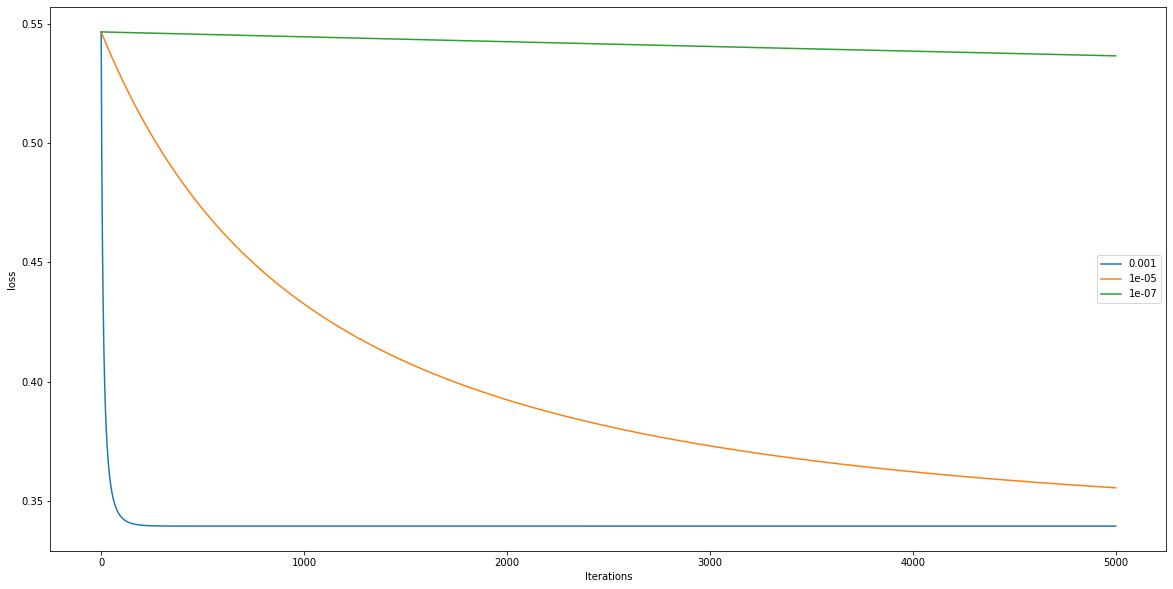

In [9]:
alpha_list = [1e-3, 1e-5, 1e-7]
model_errors = {}
for alpha in alpha_list:
    model_errors[alpha] = eval_LR_model(X_train, y_train, 5000, alpha=alpha)
    
plt.figure(figsize=(20,10))

for alpha, errors in model_errors.items():
    plt.plot(range(len(errors)), errors, label=alpha)
    
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

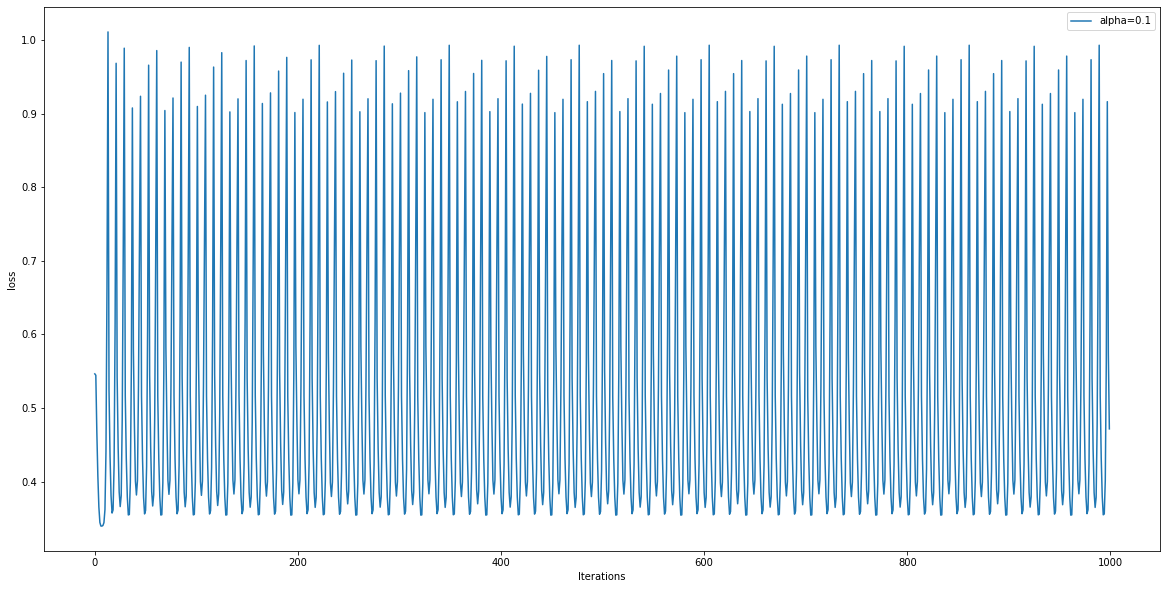

In [10]:
errors = eval_LR_model(X_train, y_train, 1000, alpha=0.1)
plt.figure(figsize=(20,10))
plt.plot(range(len(errors)), errors, label='alpha=0.1')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('loss')

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса "1". На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model.

In [11]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[1]
    
    for i in range(1, iterations+1):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X))
        #if i % (iterations / 10) == 0:
            #print(i, W, err)
    return W

In [12]:
W = eval_LR_model(X_train, y_train, iterations=1000, alpha=1e-1)
W

array([4.75339438, 1.59371589])

In [13]:
def calc_pred_proba(X, W):
    
    z = np.dot(X, W)
    y_pred_proba = sigmoid(z)
    
    return y_pred_proba

In [14]:
print(calc_pred_proba(X_train, W)[:10])  

[9.55699998e-01 9.99970002e-01 7.94146032e-01 1.56851178e-01
 3.52154225e-02 1.83389274e-04 7.32178319e-01 9.71378368e-01
 2.21850560e-01 6.49896094e-01]


4. Создайте функцию calc_pred, возвращающую предсказанные классы (0 или 1). На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, а также порог вероятности.

In [15]:
def calc_pred(X, W, threshold=0.5):
    
    z = np.dot(X, W)
    y_pred_proba = sigmoid(z)
    y_pred = np.where(y_pred_proba > threshold, 1, 0)
    
    return y_pred

In [16]:
print(calc_pred(X_train, W, 0.6)[:10])

[1 1 1 0 0 0 1 1 0 1]
